In [1]:
import math
import scipy as sp
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import kpss

import warnings

In [2]:
# 1A - 10 pts Task: Perform EDA on the dataset. Include both quantitative and qualitative descriptions. 
# Check for missing data and correlations.
df = pd.read_csv('hw1_data.csv')
df
# We can observe that there are 4 attributes and 4972 rows.

,Date,IWM,QQQ,SPY
0,2000-05-26,34.800865,67.670738,93.363678
1,2000-05-30,36.085365,74.470436,96.408173
2,2000-05-31,36.216213,72.348938,96.619591
3,2000-06-01,37.036850,76.048004,98.310966
4,2000-06-02,38.963646,81.487755,100.023491
...,...,...,...,...
4967,2020-02-26,152.328430,215.254486,305.789459
4968,2020-02-27,146.964890,204.475845,292.055939
4969,2020-02-28,144.273254,204.634949,290.828827
4970,2020-03-02,148.907211,215.194824,303.423584


In [3]:
# 1A continued

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4972 entries, 0 to 4971
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4972 non-null   object 
 1   IWM     4972 non-null   float64
 2   QQQ     4972 non-null   float64
 3   SPY     4972 non-null   float64
dtypes: float64(3), object(1)
memory usage: 155.5+ KB


In [4]:
# 1A continued

# Check for missing values - there seems to be zero!
df.isnull().sum()

Date    0
IWM     0
QQQ     0
SPY     0
dtype: int64

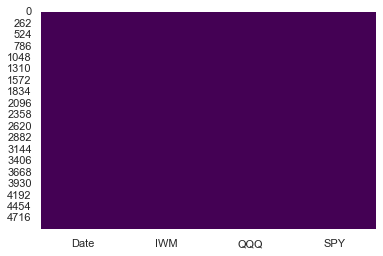

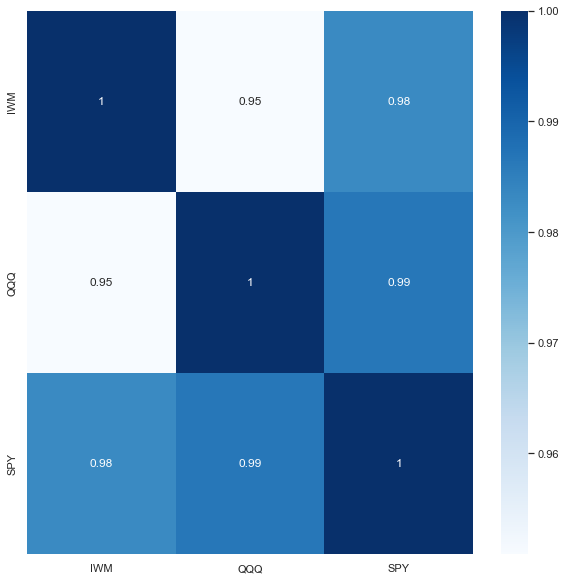

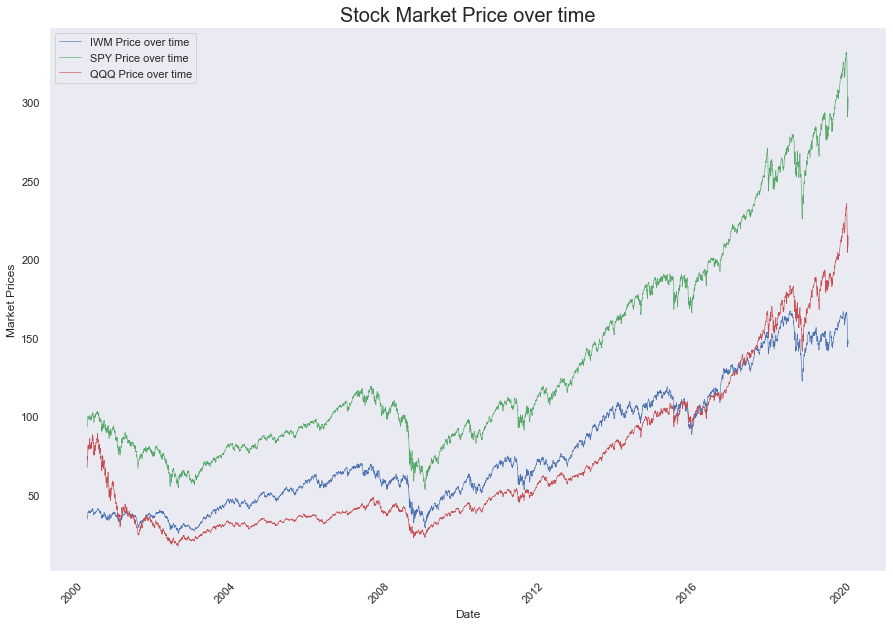

In [5]:
# 1A continued

# Visualizing the missing values
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')
# since there are no heat 'areas' appearing in our map,
# we confirm there are no missing (null values) in our data

# Asking Analytical Questions and Visualizations
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

# Now let's use the visualization to get insights on the data
# we can observe by these numerical values that there is strong positive correlation with all of these stocks.
# negative correlation - there is no negative correlations in our data

x = df['Date']
x = pd.to_datetime(x)

y = df['IWM']
z = df['SPY']
v = df['QQQ']

plt.figure(figsize=(15,10))  
plt.plot(x, y, color = 'b',label = "IWM Price over time", ls = '-', lw = 0.6)
plt.plot(x, z, color = 'g',label = "SPY Price over time", ls = '-', lw = 0.6)
plt.plot(x, v, color = 'r',label = "QQQ Price over time", ls = '-', lw = 0.6)

plt.xticks(rotation = 45)
plt.xlabel('Date')
plt.ylabel('Market Prices')
plt.title('Stock Market Price over time', fontsize = 20)
plt.grid()
plt.legend()
plt.show()

In [6]:
# 1B - 5 pts Concept: Describe the data. Do you expect this data to be stationary? 
# Do you expect this data to be a random walk?

# We define stationarity as data which its mean/variance does not change (it is constant)!
# The slope of the line would not change. However, we observe that for each of the stocks
# its mean and variance increases over time. For example, mean for each stock 
# is higher in 2016 than in 2004. 

# If you have no background in topics such as technical and fundamental analysis, you could
# propose that the random walk theory can be shown through the unpredictable movements of stock
# prices, and there are no patterns that an investor can leverage to experience gains. 

In [7]:
# 1C - 10 pts Task: Create a function that returns the stationarity test results from both ADF and KPSS tests

from statsmodels.tsa.stattools import kpss, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from copy import deepcopy

alpha = 0.05

def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)


In [8]:
adf_test(df['SPY'])

Results of Dickey-Fuller Test:
Test Statistic                    1.575206
p-value                           0.997781
#Lags Used                       17.000000
Number of Observations Used    4954.000000
Critical Value (1%)              -3.431671
Critical Value (5%)              -2.862124
Critical Value (10%)             -2.567081
dtype: float64


In [9]:
adf_test(df['QQQ'])

Results of Dickey-Fuller Test:
Test Statistic                    2.525983
p-value                           0.999058
#Lags Used                       31.000000
Number of Observations Used    4940.000000
Critical Value (1%)              -3.431674
Critical Value (5%)              -2.862125
Critical Value (10%)             -2.567082
dtype: float64


In [10]:
adf_test(df['IWM'])

Results of Dickey-Fuller Test:
Test Statistic                   -0.148096
p-value                           0.944432
#Lags Used                       17.000000
Number of Observations Used    4954.000000
Critical Value (1%)              -3.431671
Critical Value (5%)              -2.862124
Critical Value (10%)             -2.567081
dtype: float64


In [11]:
ad_fuller_results = adfuller(df['SPY'])
ad_fuller_pval = ad_fuller_results[1]
ad_fuller_bool = ad_fuller_pval <= alpha

print(f'stationarity from ad_fuller test: {ad_fuller_bool}')

stationarity from ad_fuller test: False


In [12]:
ad_fuller_results = adfuller(df['QQQ'])
ad_fuller_pval = ad_fuller_results[1]
ad_fuller_bool = ad_fuller_pval <= alpha

print(f'stationarity from ad_fuller test: {ad_fuller_bool}')

stationarity from ad_fuller test: False


In [13]:
ad_fuller_results = adfuller(df['IWM'])
ad_fuller_pval = ad_fuller_results[1]
ad_fuller_bool = ad_fuller_pval <= alpha

print(f'stationarity from ad_fuller test: {ad_fuller_bool}')

stationarity from ad_fuller test: False


In [14]:
#define KPSS
def kpss_test(timeseries, trend='c'):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression=trend)
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [15]:
kpss_test(df['SPY'])

Results of KPSS Test:
Test Statistic           12.14194
p-value                   0.01000
Lags Used                32.00000
Critical Value (10%)      0.34700
Critical Value (5%)       0.46300
Critical Value (2.5%)     0.57400
Critical Value (1%)       0.73900
dtype: float64


/Users/earnestsalgado/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/Users/earnestsalgado/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [16]:
kpss_test(df['SPY'], trend='ct')

Results of KPSS Test:
Test Statistic            3.121065
p-value                   0.010000
Lags Used                32.000000
Critical Value (10%)      0.119000
Critical Value (5%)       0.146000
Critical Value (2.5%)     0.176000
Critical Value (1%)       0.216000
dtype: float64


/Users/earnestsalgado/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [17]:
kpss_test(df['QQQ'])

Results of KPSS Test:
Test Statistic           11.379166
p-value                   0.010000
Lags Used                32.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/Users/earnestsalgado/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [18]:
kpss_test(df['QQQ'], trend='ct')

Results of KPSS Test:
Test Statistic            3.103066
p-value                   0.010000
Lags Used                32.000000
Critical Value (10%)      0.119000
Critical Value (5%)       0.146000
Critical Value (2.5%)     0.176000
Critical Value (1%)       0.216000
dtype: float64


/Users/earnestsalgado/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [19]:
kpss_test(df['IWM'])

Results of KPSS Test:
Test Statistic           13.164847
p-value                   0.010000
Lags Used                32.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/Users/earnestsalgado/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [20]:
kpss_test(df['IWM'], trend='ct')

Results of KPSS Test:
Test Statistic            2.610149
p-value                   0.010000
Lags Used                32.000000
Critical Value (10%)      0.119000
Critical Value (5%)       0.146000
Critical Value (2.5%)     0.176000
Critical Value (1%)       0.216000
dtype: float64


/Users/earnestsalgado/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [22]:
kpss_test_results = kpss(df['SPY'])
kpss_pval = kpss_test_results[1]
kpss_test_bool = kpss_pval >= alpha

print(f'stationarity from KPSS test: {kpss_test_bool}')

stationarity from KPSS test: False


/Users/earnestsalgado/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [23]:
kpss_test_results = kpss(df['QQQ'])
kpss_pval = kpss_test_results[1]
kpss_test_bool = kpss_pval >= alpha

print(f'stationarity from KPSS test: {kpss_test_bool}')

stationarity from KPSS test: False


/Users/earnestsalgado/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [24]:
kpss_test_results = kpss(df['IWM'])
kpss_pval = kpss_test_results[1]
kpss_test_bool = kpss_pval >= alpha

print(f'stationarity from KPSS test: {kpss_test_bool}')

stationarity from KPSS test: False


/Users/earnestsalgado/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [ ]:
# 1D - 5 pts Task: Use the function to test if each series is stationary. 
# Return results from both ADF and KPSS tests for all three time series

